In [4]:
import matplotlib.pyplot as plt
import numpy as np
import wave

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['font.size'] = '14'

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9661/432361369.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


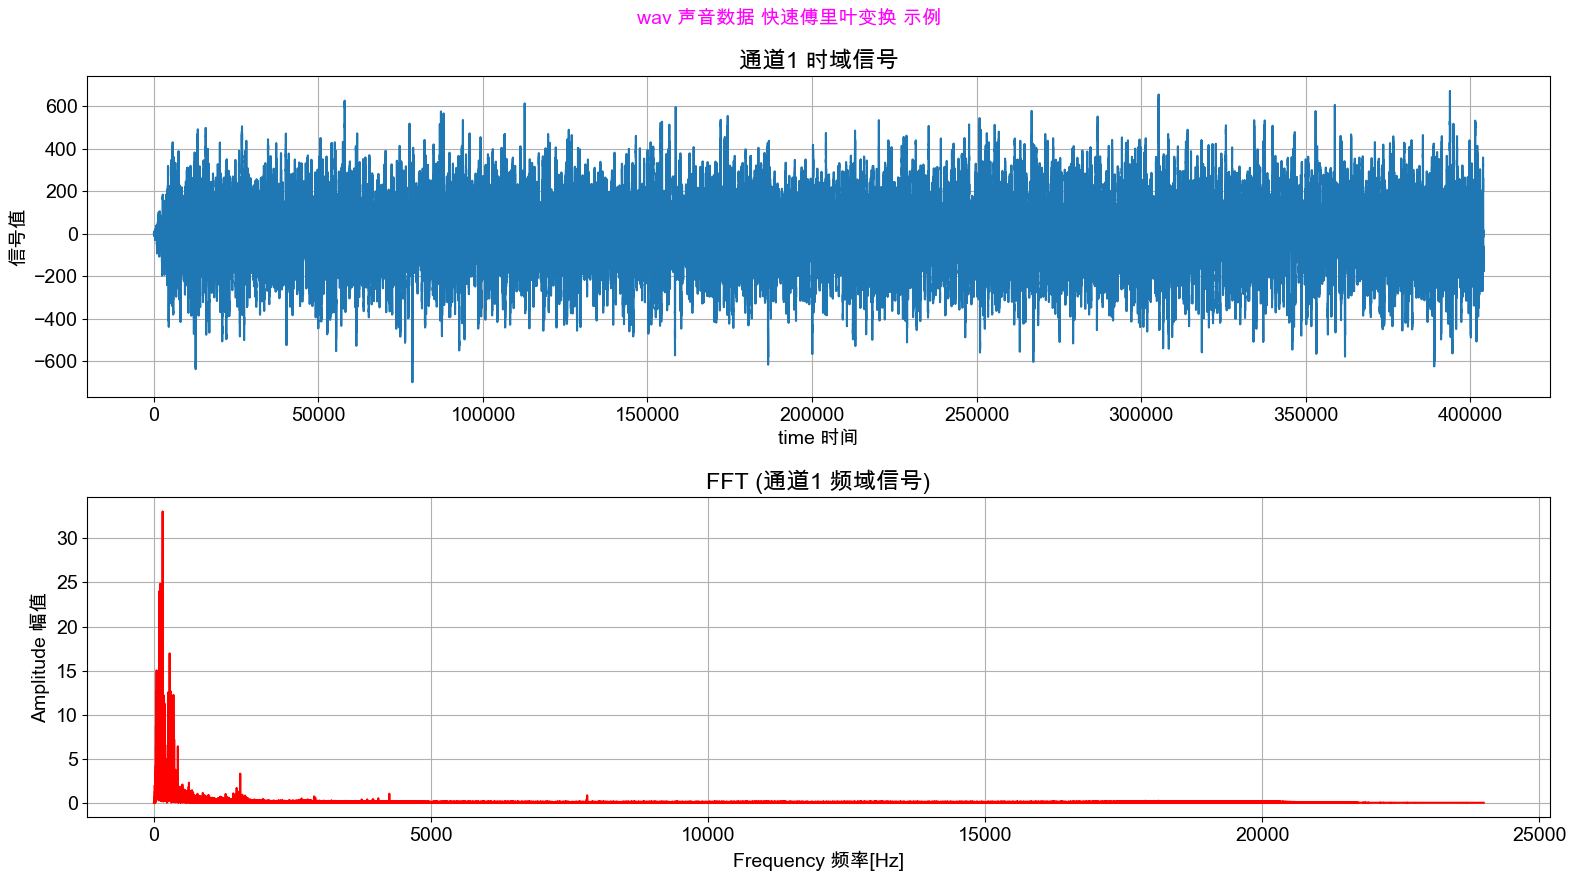

In [62]:
class Reader:
    def __init__(self, path, lhs = 0, rhs = 1) -> None:
        self.path = path
        self.lhs = lhs
        self.rhs = rhs
        try:
            self.file = wave.open(self.path, "rb")
        except:
            print("Error with file.")
        
        
        self.nchannels, self.sampwidth, self.framerate, self.nframes = self.file.getparams()[:4]
        self.time_len = self.nframes*1.0 / self.framerate #声音时长
        str_data = self.file.readframes(self.nframes)
        wave_data = np.fromstring(str_data, dtype=np.short)
        wave_data.shape = -1, self.nchannels
        self.wave_data = wave_data.T
        self.wave_data = self.wave_data[:, int(lhs * self.wave_data.shape[1]):int(rhs * self.wave_data.shape[1])]
    
    def show(self):
        self.FFT()
        self.plot()
        
    def showWith(self, that):
        self.FFTwith(that)
        self.plot()
        
        
    def FFT(self):
        y_freq = np.fft.fft(self.wave_data)
        bias =  (y_freq[:, 0] / self.nframes).real
        yf_amplitude = np.abs(y_freq)* (2.0/self.nframes)
        yf_amplitude[:, 0] = bias
        self.yf_amplitude = yf_amplitude[:, 0:self.nframes//2]
        
    def FFTwith(self, that):
        that.FFT()
        y_freq = np.fft.fft(self.wave_data)
        bias =  (y_freq[:, 0] / self.nframes).real
        yf_amplitude = np.abs(y_freq)* (2.0/self.nframes)
        yf_amplitude[:, 0] = bias
        self.yf_amplitude = yf_amplitude[:, 0:self.nframes//2]
        self.yf_amplitude = self.yf_amplitude - np.abs(that.yf_amplitude[0, :self.yf_amplitude.shape[1]])
    
    
    
    def plot(self):
        plt.figure(figsize=(16, 9))
        # self.time = np.arange(0, self.nframes) * (1.0 / self.framerate)
        self.freq = np.arange(0,self.nframes//2) * self.framerate / self.nframes #实际频率
        for i in range(self.nchannels):
            plt.subplot(2, self.nchannels, i+1)
            plt.plot(self.wave_data[i, int(self.lhs * self.wave_data.shape[1]):int(self.rhs * self.wave_data.shape[1])])
            plt.xlabel("time 时间")
            plt.ylabel("信号值")
            plt.grid()
            plt.title("通道%d 时域信号" %(i+1))
            plt.subplot(2, self.nchannels, self.nchannels+i+1)
            plt.plot(self.freq, self.yf_amplitude[i, ], "r-")
            plt.xlabel("Frequency 频率[Hz]")
            plt.ylabel("Amplitude 幅值")
            plt.grid()
            plt.title("FFT (通道%d 频域信号)"%(i+1))    
        plt.suptitle("wav 声音数据 快速傅里叶变换 示例", fontsize =14, color ="magenta")
        plt.tight_layout()
        plt.show()
        
Reader("noise.wav").show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9661/3029766267.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


TypeError: slice indices must be integers or None or have an __index__ method

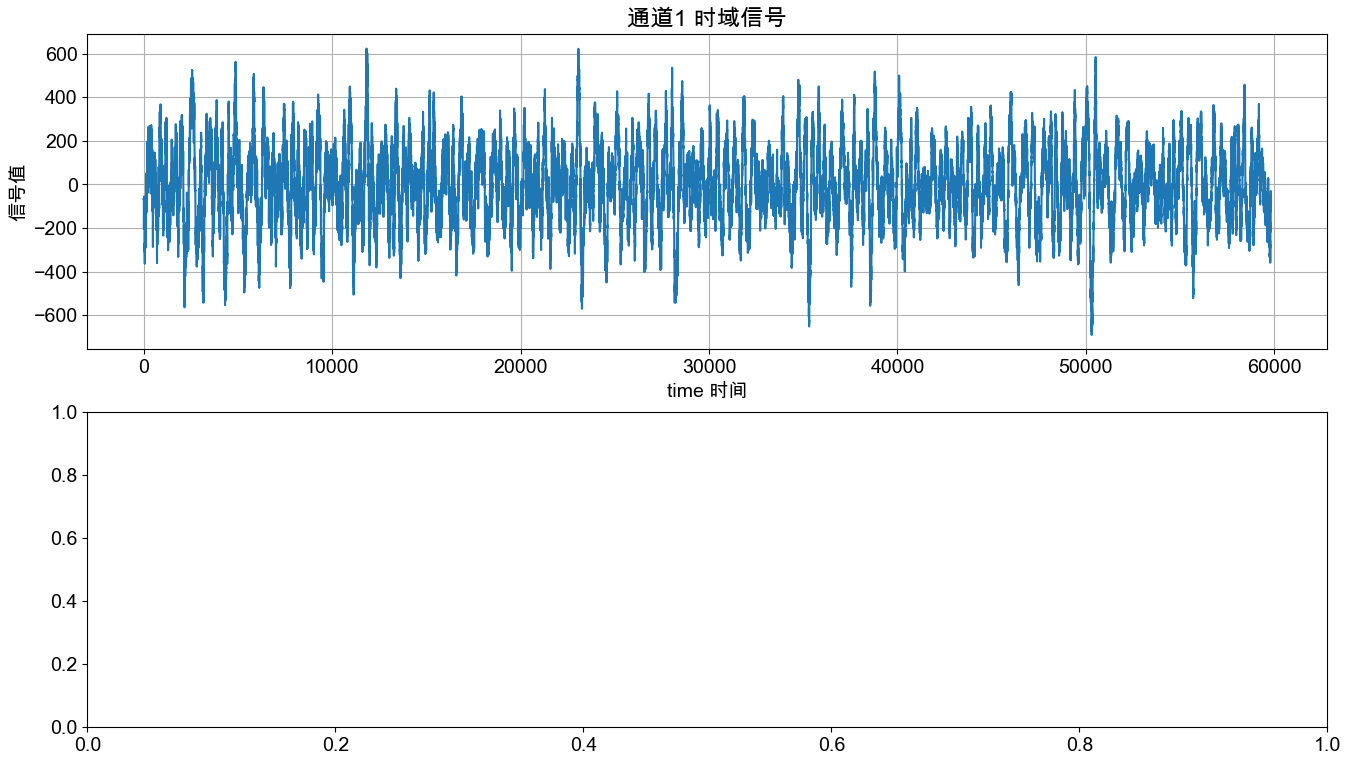

In [16]:
Reader("osc_1.wav", 0.4).show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9105/2562191652.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


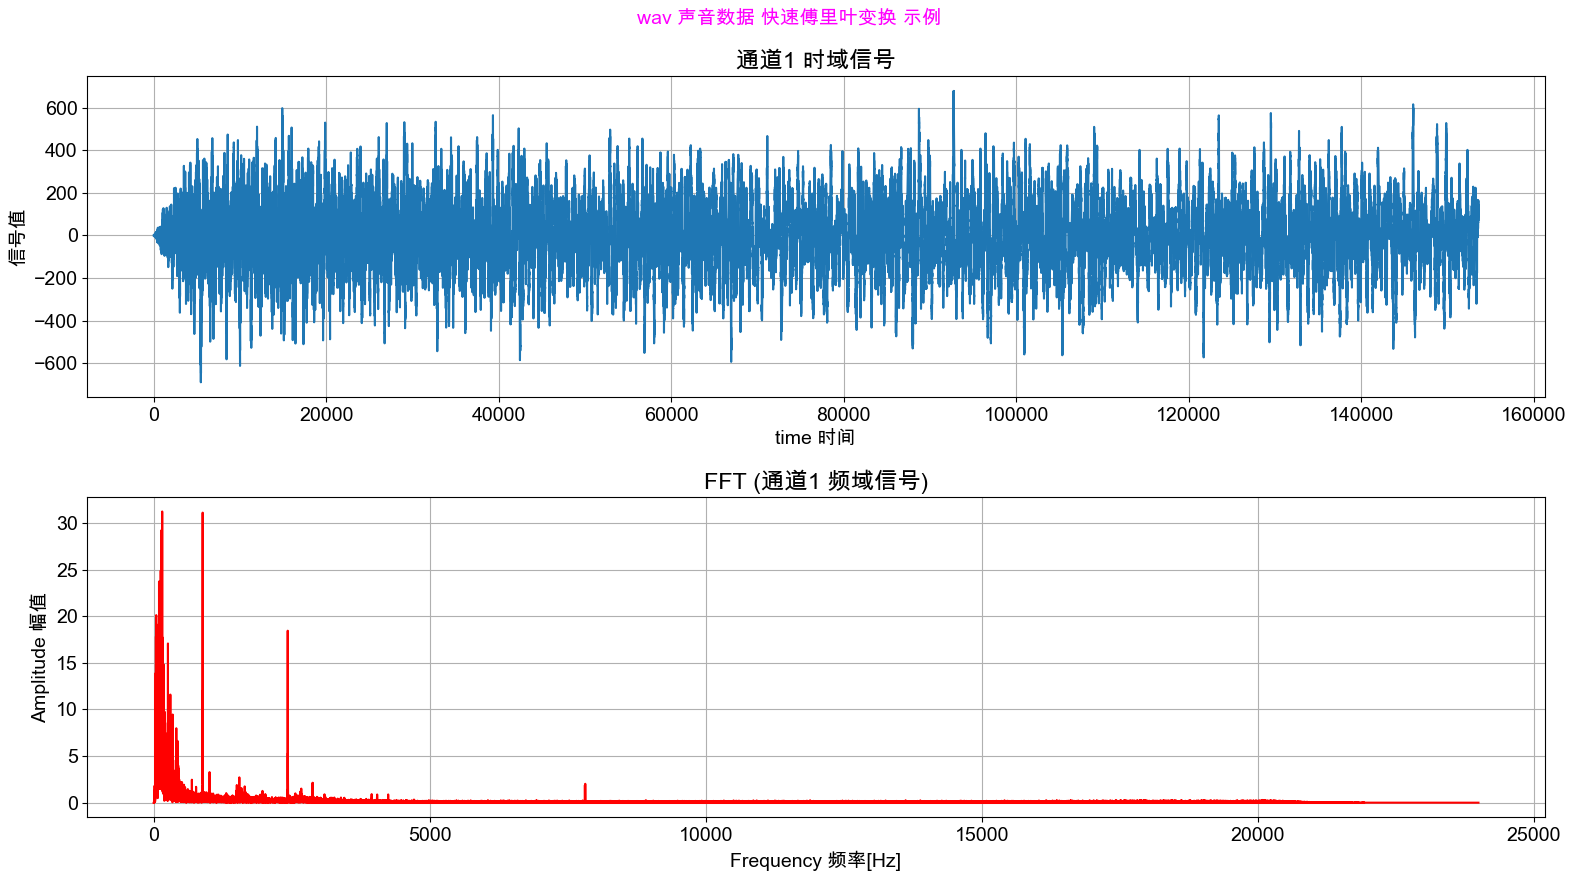

In [ ]:
Reader("osc_2.wav").show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9661/1370543604.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


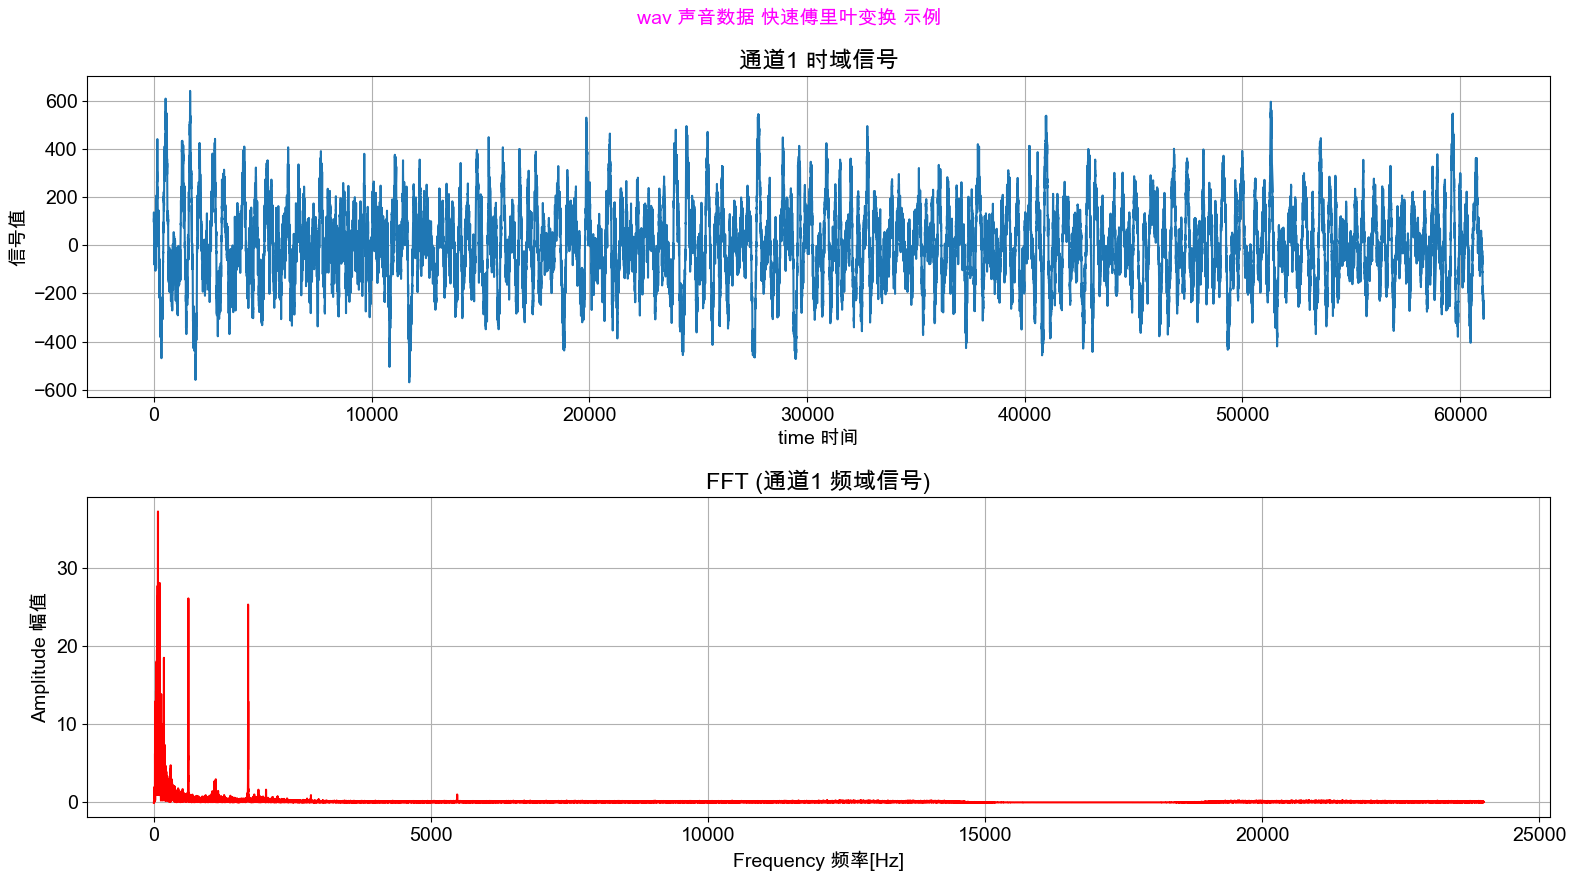

In [29]:
Reader("osc_3.wav", 0.3).show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9661/1370543604.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


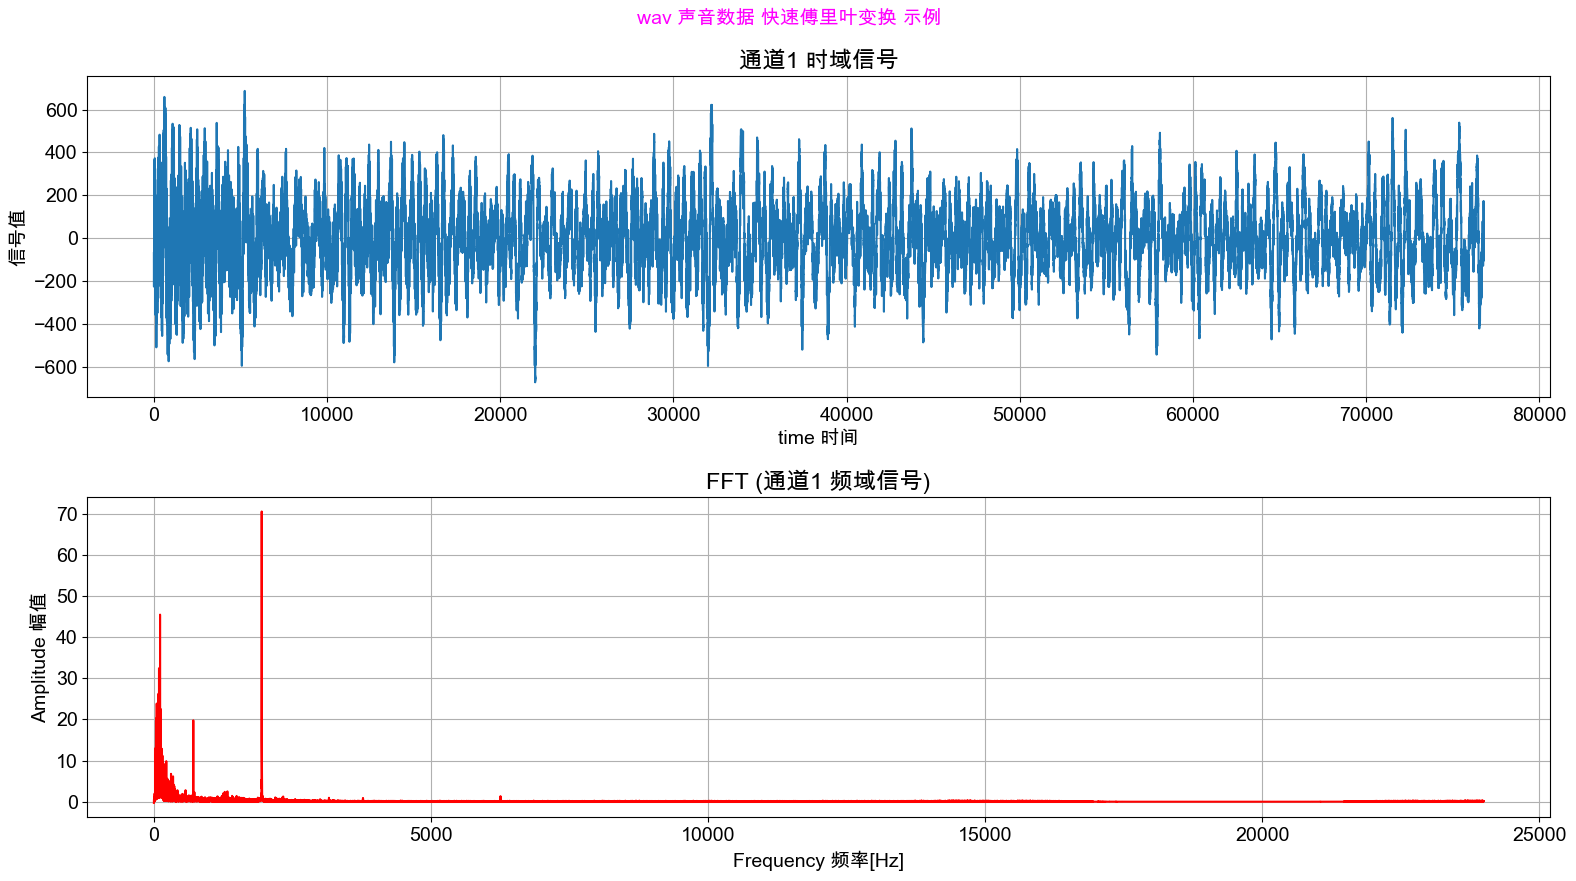

In [42]:
Reader("osc_4.wav", 0.2, ).show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9661/1370543604.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


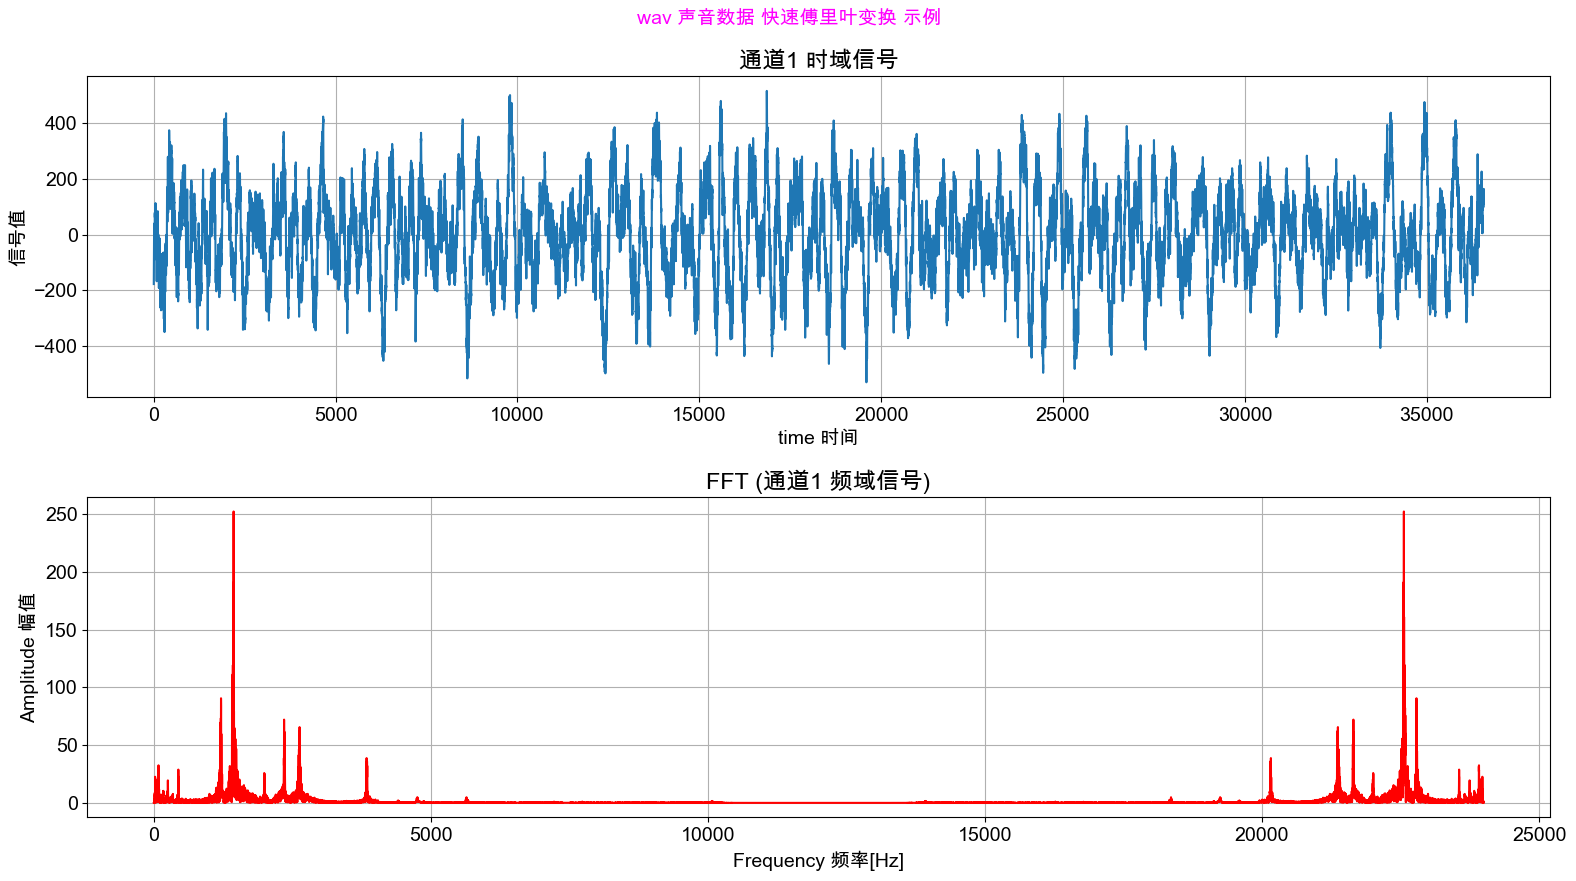

In [49]:
Reader("osc_5.wav", 0.3, 0.8).show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9105/2562191652.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


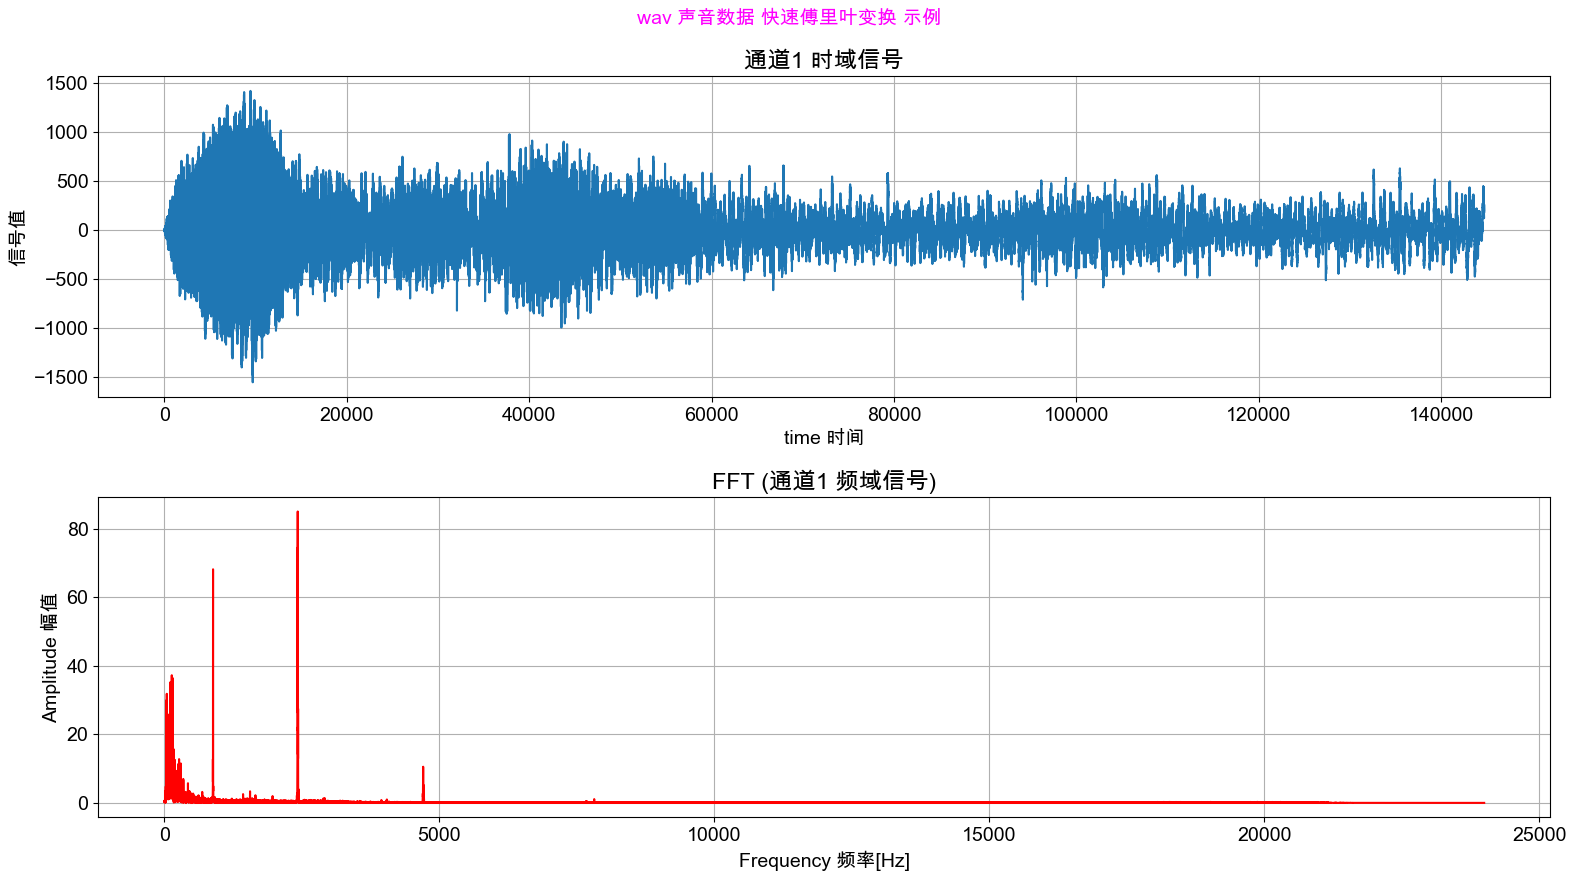

In [ ]:
Reader("osc_6.wav").show()

/var/folders/mh/ypvnyzt13wx0zh1tjkqvy6yh0000gn/T/ipykernel_9105/2562191652.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


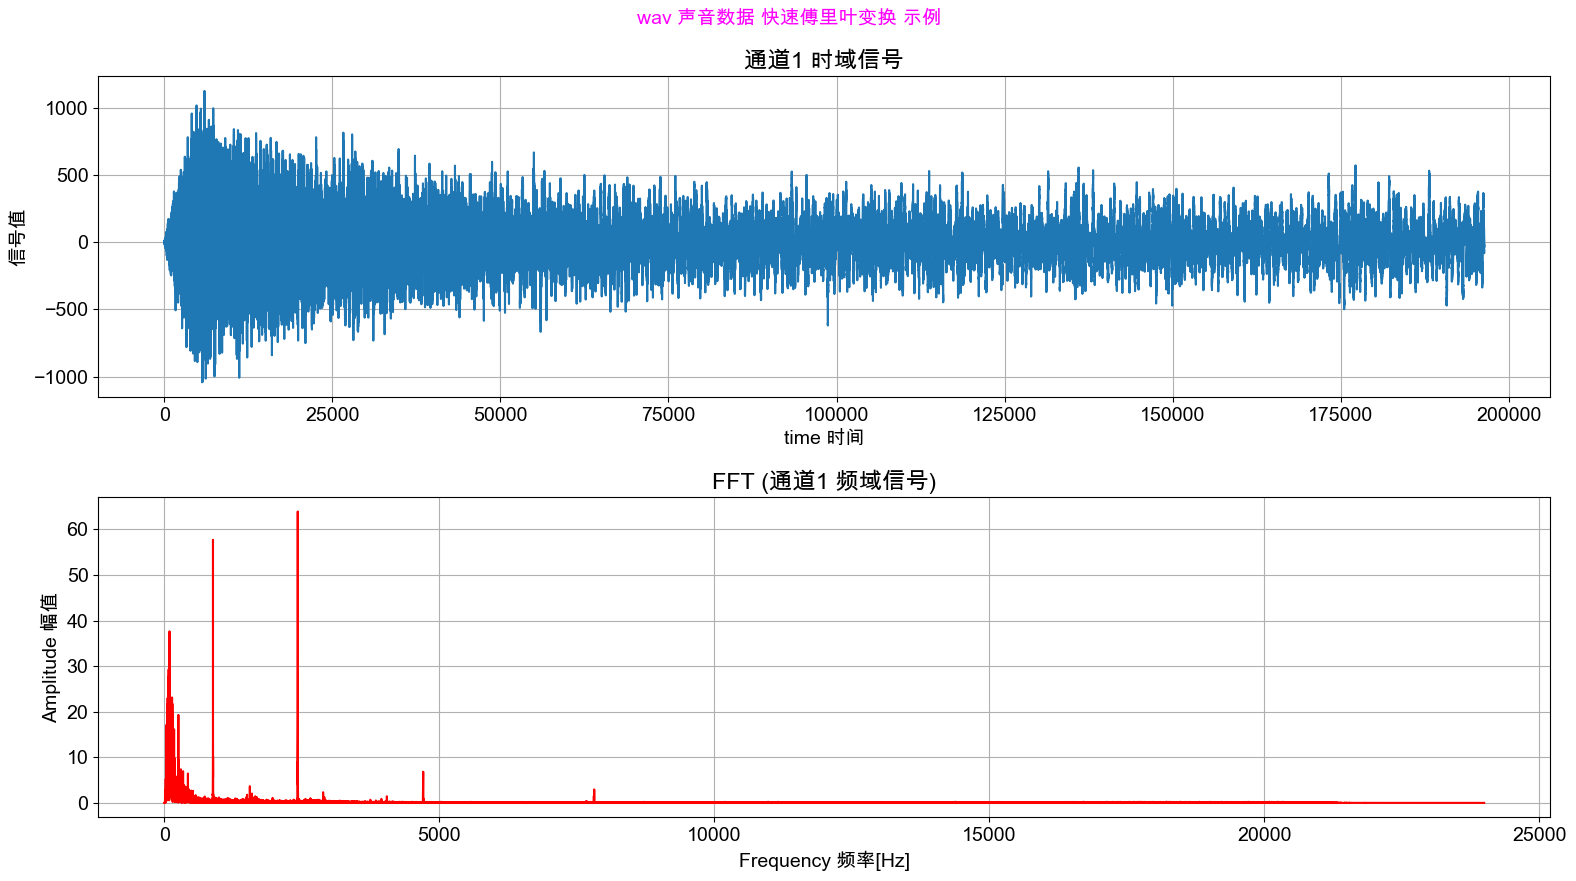

In [ ]:
Reader("osc_7.wav").show()